<a href="https://colab.research.google.com/github/leunco/Hands_On_MachineLearning/blob/main/4%EC%A3%BC%EC%B0%A8/%EA%B9%80%EB%8B%A4%EC%98%81/Chap9_%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

## Chap10. 비지도 학습
몇 가지 대표적인 비지도 학습 알고리즘을 살펴본다.

### 군집(clustering)
- 비슷한 샘플을 군집(cluster)으로 모은다.
- 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소 등에 사용할 수 있는 훌륭한 알고리즘이다.

### 이상치 탐지(outlier detection)
- '정상' 데이터가 어떻게 보이는지 학습하여 '비정상' 샘플을 감지하는데 사용한다.
- 제조 라인에서 결함 제품을 감지하거나 시계열 데이터에서 새로운 트렌드를 찾는다.

### 밀도 추정(density estimation)
- 데이터셋 생성 확률 과정의 확률 밀도 함수를 추정한다.
- 밀도 추정은 이상치 탐지에 널리 사용된다. 밀도가 매우 낮은 영역에 놓인 샘플이 이상치일 가능성이 높다.
- 데이터 분석과 시각화에도 유용하다.

## 9.1 군집(clustering)
**군집**은 비슷한 샘플을 구별하여 하나의 클러스터(cluster) 또는 비슷한 샘플의 그룹으로 할당하는 작업이다.

분류와 마찬가지로 **각 샘플은 하나의 그룹에 할당**된다.

그러나 분류와 다르게 군집은 비지도 학습이다. 데이터셋이 클래스가 구분되어 레이블 되어 있다면 로지스틱 회귀, SVM, 랜덤 포레스트 분류기 같은 분류 알고리즘이 잘 맞지만, **레이블이 없다면** 분류 알고리즘을 사용할 수 없다. 즉 **군집 알고리즘이 필요**한 경우이다.

클러스터에 대한 보편적인 정의는 없으며, 사용되는 알고리즘이 다르면 다른 종류의 클러스터를 감지한다.

어떤 알고리즘은 센트로이드라고 부르는 특정 포인트를 중심으로 모인 샘플을 찾고, 어떤 알고리즘은 샘플이 밀집되어 연속된 영역을 찾는다. 또한 어떤 알고리즘은 계층적으로 클러스터의 클러스터를 찾는다.

군집은 다음과 같은 다양한 애플리케이션에서 사용된다.

> **고객 분류**
- 고객을 구매 이력이나 웹사이트 내 행동 등을 기반으로 클러스터로 모은다.
- 이는 고객이 누구인지, 무엇을 원하는지를 이해하는데 도움이 되어 고객 그룹마다 제품 추천이나 마케팅 전략을 다르게 적용할 수 있다.
- 예를 들어 동일한 클러스터 내의 사용자가 좋아하는 컨텐츠를 추천하는 추천 시스템을 만들 수 있다.

> **데이터 분석**
- 새로운 데이터셋을 분석할 때 군집 알고리즘을 실행하여 각 클러스터를 따로 분석하면 더 편리하다.

> **차원 축소 기법**
- 한 데이터셋에 군집 알고리즘을 적용하면 **각 클러스터에 대한 샘플의 친화성**을 측정할 수 있다. 친화성은 **샘플이 클러스터에 얼마나 잘 맞는지**를 측정하는 것이다.
- 각 샘플의 특성 벡터를 클러스터 친화성의 벡터로 바꿀 수 있다. k개의 클러스터가 있다면 이 벡터는 k차원이 된다.
- 클러스터 친화성 벡터는 원본 특성 벡터보다 훨씬 저차원이어서 편리하면서도 분석을 위한 충분한 정보를 가질 수 있다.

> **이상치 탐지**
- **모든 클러스터에 친화성이 낮은 샘플은 이상치**일 가능성이 높다.
- 이상치 탐지는 특히 제조 분야에서 결함을 감지할 때 유용하며, 부정 거래 감지에도 활용된다.

> **준지도 학습**
- **레이블된 샘플이 적다면** 군집을 수행하고, **동일한 클러스터에 있는 모든 샘플에 레이블을 전파**할 수 있다.
- 이 기법은 **지도 학습 알고리즘에 필요한 레이블을 증가**시켜서 성능을 크게 향상시킨다.

> **검색 엔진**
- 제시된 이미지와 비슷한 이미지를 찾는 시스템을 구축하려면 먼저 데이터베이스에 있는 모든 이미지에 군집 알고리즘을 적용해야 한다.
- 비슷한 이미지는 동일한 클러스터에 속하게 되고, 사용자가 찾으려는 이미지를 제공하면 훈련된 군집 모델을 사용하여 이미지의 클러스터를 찾는다. 그 다음 해당 클러스터의 모든 이미지를 반환한다.

> **이미지 분할**
- **색을 기반**으로 하여 픽셀을 클러스터로 모으고, 그 다음 **각 픽셀의 색을 해당 클러스터의 평균 색으로 바꾼다.** 이 방법은 이미지에 있는 색상의 종류를 크게 줄인다.
- 이 기법을 사용하면 물체의 윤곽을 감지하기 쉬워져서 물체 탐지 및 추적 시스템에서 많이 사용된다.

### 9.1.1 k-평균
먼저 `make_blobs()` 함수를 이용하여 2,000개의 데이터 샘플을 생성한다.

생성되는 데이터는 지정된 5개의 센터를 중심으로 지정된 표준편차를 따르는 원 모양의 데이터 군집을 이룬다. 또한 각각의 군집은 거의 동일한 크기를 갖는다.

산점도를 그려보면 이 데이터셋은 샘플 덩어리가 5개로 잘 구분되어 보인다.

k-평균은 몇 번의 반복을 통하여 이런 종류의 데이터셋을 빠르고 효율적으로 클러스터로 묶을 수 있는 간단한 알고리즘이다.

In [ ]:
import numpy as np
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [ ]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

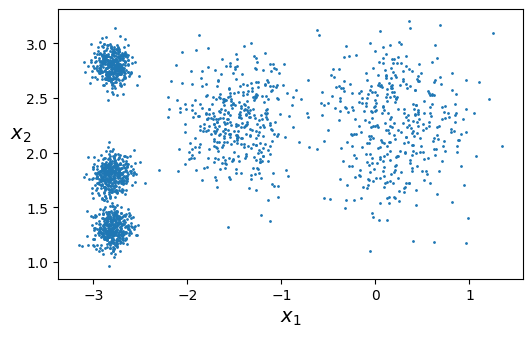

In [ ]:
import matplotlib.pyplot as plt
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(6,3.5))
plot_clusters(X)
plt.show()

k-평균 알고리즘은 **각 클러스터의 중심**을 찾고, **가장 가까운 클러스터에 샘플을 할당**한다. 이 알고리즘을 실행하기 위해서는 알고리즘이 찾을 **클러스터의 개수 k를 지정**해야 한다.

사이킷런은 k-평균 알고리즘을 위해 `KMeans` 클래스를 제공한다. 군집화할 클러스터의 개수는 `n_clusters`로 지정할 수 있다. 임의로 생성한 이 데이터셋은 5개의 클러스터가 존재하는 것으로 보이므로 5로 지정한다. 이제 각 샘플은 5개의 클러스터 중 하나에 할당된다.

`KMeans` 클래스에 `fit_predict()` 함수를 적용하면 각 샘플의 레이블을 반환한다. 이 레이블은 알고리즘이 샘플에 할당한 **군집의 인덱스**이다.

`KMeans` 클래스의 `labels_` 속성에 **각 훈련 샘플에 대한 군집 인덱스**가 저장된다.


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
y_pred = kmeans.fit_predict(X)
y_pred

array([4, 0, 1, ..., 3, 1, 0], dtype=int32)

In [ ]:
kmeans.labels_

array([4, 0, 1, ..., 3, 1, 0], dtype=int32)

`cluster_centers_` 속성을 이용하여 **각 군집의 중심인 5개의 센트로이드**도 확인할 수 있다.

학습된 모델에 `predict()` 메서드를 이용하여 새로운 데이터에 대한 군집 예측도 가능하다.

In [ ]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [ ]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3], dtype=int32)

다음의 함수를 따라 **군집을 나누는 결정경계**를 그리면 보로노이 다이어그램이 생성된다. 이때 각 군집의 센트로이드는 x로 표시되어 있다.
 - plot_data() 함수는 여기서만 사용되는 기본값이 지정된 산점도를 그린다.
 - plot_centroids() 함수는 센트로이드를 시각화한다.
  - weights=None 옵션: 특정 가중치 이상의 센트로이드만 그리도록 하는 설정으로,
  나중에 가우시안 혼합 모델을 시각화할 때 사용된다.
 - plot_decision_boundaries() 함수는 결정경계를 시각화한다.
  - cluster_mod: 훈련된 군집화 모델 객체
  - X: 훈련 세트

In [ ]:
# 산점도 그리기
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

# 센트로이드 그리기
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]

    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)

    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

In [ ]:
def plot_decision_boundaries(cluster_mod, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    # 바탕화면 그리기
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = cluster_mod.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')

    # 훈련 샘플 산점도 그리기
    plot_data(X)
    # 센트로이드 그리기
    if show_centroids:
        plot_centroids(cluster_mod.cluster_centers_)
    # 기타: x, y 축 레이블
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

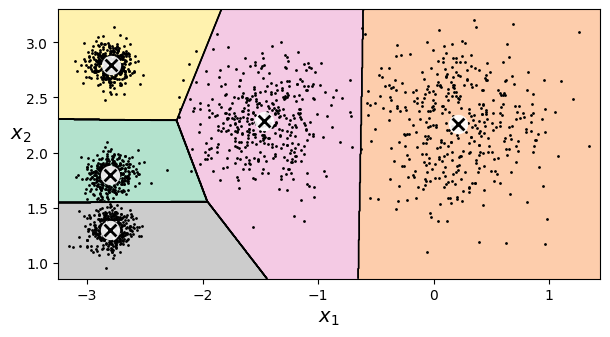

In [ ]:
plt.figure(figsize=(7,3.5))
plot_decision_boundaries(kmeans, X)
plt.show()

위의 그림을 보면 샘플이 대부분 적절한 클러스터에 잘 할당되었다. 그러나 왼쪽 위의 클러스터와 가운데 클러스터의 경계 부근에서 몇 개의 샘플이 레이블이 잘못 부여된 것을 확인할 수 있다.

k-평균 알고리즘은 샘플을 클러스터에 할당할 때 센트로이드까지의 거리를 고려하는 것이 전부이므로, 클러스터의 크기가 많이 다르면 잘 작동하지 않는다.

샘플을 하나의 클러스터에 할당하는 것을 **하드 군집**이라고 한다. 하드 군집보다 **클러스터마다 샘플에 점수를 부여**하는 **소프트 군집**이 더 유용할 수 있다. 이 점수는 샘플과 센트로이드 사이의 거리가 될 수 있으며, 가우시안 방사 기저 함수와 같은 유사도 점수가 될 수도 있다.

`KMeans` 클래스의 `transform()` 메서드는 **샘플과 각 센트로이드 사이의 거리**를 반환한다.

앞서 새로운 데이터 X_new의 군집 인덱스를 추정한 결과를 살펴보면 샘플과 각 센트로이드 사이의 거리가 가장 작은 군집의 인덱스를 반환하였음을 알 수 있다.

이러한 변환은 4개의 샘플에 대하여 5개의 클러스터 중심과의 거리를 나타내는 벡터로 변환한 것이다. 즉 고차원 데이터셋을 이런 방식으로 변환하면 **k-차원 데이터셋**이 만들어지며, 매우 효율적인 비선형 차원 축소 기법이 될 수 있다.

In [ ]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 1.49439034, 2.9042344 , 2.88633901],
       [5.80730058, 2.80290755, 4.4759332 , 5.84739223, 5.84236351],
       [1.21475352, 3.29399768, 1.69136631, 0.29040966, 1.71086031],
       [0.72581411, 3.21806371, 1.54808703, 0.36159148, 1.21567622]])

In [ ]:
kmeans.predict(X_new)

array([1, 1, 3, 3], dtype=int32)

#### **k-평균 알고리즘**
만약 센트로이드가 주어진다면 알고리즘은 데이터셋에 있는 모든 샘플에 가장 가까운 센트로이드의 클러스터를 할당한다.

반대로 센트로이드는 주어지지 않았지만 모든 샘플의 레이블이 주어진다면 각 클러스터에 속한 샘플들의 평균을 계산하여 모든 센트로이드를 쉽게 구할 수 있다.

그러나 레이블과 센트로이드가 모두 주어지지 않을 수 있다. 이러한 경우에는 **먼저 무작위로 k개의 샘플**을 뽑아 그 위치를 센트로이드로 선정한다. 그 다음 **샘플에 레이블을 할당하고 센트로이드를 업데이트**하고, 다시 샘플에 레이블을 할당하고 센트로이드를 업데이트하는 식으로 **센트로이드의 변화가 없을 때까지 계속 반복**한다. 이 알고리즘은 무한하게 반복되지 않고 제한된 작은 횟수 안에 수렴하는 것을 보장한다.  

아래의 그림에서 k-평균 알고리즘이 작동하는 것을 볼 수 있다.
- 왼쪽 위 그림은 처음에 랜덤하게 선정하여 센트로이드를 초기화한 것이다.
- 오른쪽 위 그림은 샘플에 레이블을 할당한 것이다.
- 왼쪽 가운데 그림은 센트로이드를 업데이트한 것이다.
- 오른쪽 가운데 그림은 업데이트된 센트로이드에 맞춰 다시 샘플에 레이블을 할당한 것이다.
- 오른쪽 아래 그림을 보면 이 알고리즘이 반복 3번 만에 최적으로 보이는 클러스터에 도달한 것을 확인할 수 있다.

In [ ]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

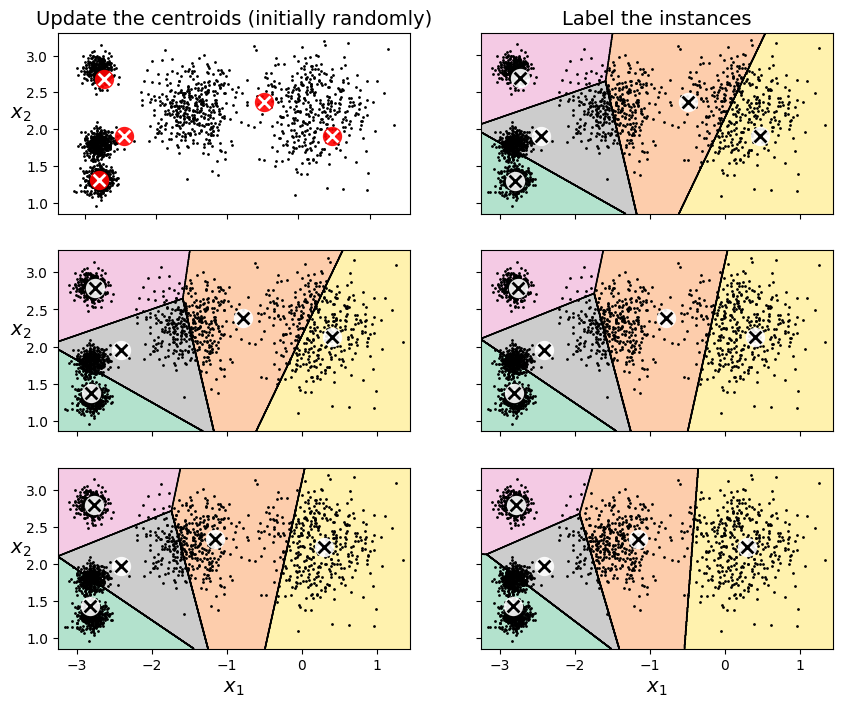

In [ ]:
plt.figure(figsize=(10, 8))

# 위 왼쪽 그림
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

# 위 오른쪽 그림
plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

# 가운데 왼쪽 그림
plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

# 가운데 오른쪽 그림
plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

# 아래 왼쪽 그림
plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

# 아래 오른쪽 그림
plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

그러나 k-평균 알고리즘은 수렴하는 것은 보장하지만 적절한 솔루션으로 수렴하지 못할 수 있다. 즉 수렴하는 결과가 지역 최적점일 수 있다.

이 여부는 **센트로이드의 초기화**에 달려있다. 센트로이드 초기화가 **무작위**로 이루어질 경우 **적절하지 않은 군집화**를 얻을 수 있다.

아래 코드는 두 개의 나쁜 경우를 잘 보여준다. 두 경우 모두 적절치 않는 모델을 생성한다.

이를 위해 사용한 plot_clusterer_comparison() 함수는 두 개의 결정경계 그래프를 동시에 그려준다.

In [ ]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

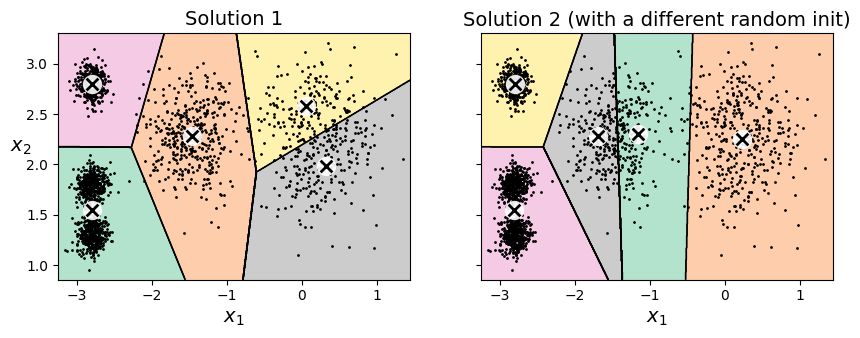

In [ ]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="full", random_state=3)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X, "Solution 1", "Solution 2 (with a different random init)")
plt.show()

#### **센트로이드 초기화 방법**
센트로이드의 위치를 알 수 있다면 `KMeans`의 **`init` 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정**하고 `n_init=1`로 설정하면 된다.
- init='k-means++': 초기화 알고리즘
 - 'random'을 사용할 경우 무작위로 지정
 - 'k-means++': 센트로이드 간의 거리를 최대한 크게하는 알고리즘으로 기본값

또 다른 방법은 랜덤 초기화를 다르게 하여 **여러번 알고리즘을 실행하고 가장 좋은 솔루션을 선택**하는 것이다. 랜덤 초기화 횟수는 `n_init` 매개변수로 조절하며 기본값은 10이다. 이는 `fit()` 메서드를 호출할 때 앞서 설명한 전체 알고리즘이 10번 실행된다는 뜻으로, 사이킷런은 이중에서 최선의 솔루션을 반환한다.

반환된 결과가 최선인지 알기 위해서 사용하는 성능 지표로 **이너셔**(inertia)를 사용한다. 이 값은 **각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리**이다.

`KMeans` 클래스는 알고리즘을 **`n_init`으로 지정한 횟수만큼 실행하여 이너셔가 가장 낮은 모델을 반환**한다. 이너셔 값은 **`inertia_`** 인스턴스 변수로 확인할 수 있다.

`score()` 메서드는 **이너셔의 음수값을 반환**한다. 이는 예측기의 `score()` 메서드가 사이킷런의 '큰 값이 좋은 것이다'라는 규칙을 따르기 때문으로 211.59보다 큰 값인 이너셔는 음수값으론 211.59보다 작으므로 `score()` 메서드를 적용해도 출력되지 않는다.

In [ ]:
kmeans.inertia_

211.5985372581684

In [ ]:
kmeans.score(X)

-211.59853725816836

k-평균 알고리즘을 향상시킨 **k-평균++ 알고리즘**이 소개되었는데, 이 방법은** k-평균 알고리즘이 최적이 아닌 솔루션으로 수렴할 가능성을 크게 낮춘다.**

k-평균++ 알고리즘을 소개한 논문에서는 다른 센트로이드와 거리가 먼 센트로이드를 선택하는 똑똑한 초기화 단계를 소개했다. 최적의 솔루션을 찾기 위해 실행하는 알고리즘 반복 횟수를 크게 줄일 수 있으므로 이 똑똑한 초기화 단계에 드는 추가 계산이 충분한 가치가 있다는 것을 보여주었다.

k-평균++ 초기화 알고리즘의 단계는 다음과 같다.
1. 데이터셋에서 무작위로 균등하게 하나의 센트로이드 $𝓬^{(1)}$를 선택한다.
2. $D(𝐱^{(i)})^2/\displaystyle\sum_{j=1}^mD(𝐱^{(j)})^2$의 확률로 샘플 $𝐱^{(i)}$를 새로운 센트로이드 $𝓬^{(i)}$로 선택한다. 여기서 $D(𝐱^{(i)})^2$는 샘플 $𝐱^{(i)}$와 이미 선택된 가장 가까운 센트로이까지의 거리이다. 이 확률 분포는 이미 선택한 센트로이드에서 멀리 떨어진 샘플을 다음 센트로이드로 선택할 가능성을 높인다.
3. k개의 센트로이드가 선택될 때까지 이전 단계를 반복한다.

`KMeans` 클래스는 기본적으로 이 초기화 방법을 사용하므로 `init`의 기본값은 `k-means++`이다.

만약 k개의 샘플을 랜덤하게 선택하여 초기 센트로이드로 지정하는 원래 방식을 사용하고 싶다면 `init` 매개변수를 `random`으로 지정하면 된다.

#### **k-평균 속도 개선과 미니배치 k-평균**
찰스 엘칸은 k-평균 알고리즘에 대해 불필요한 거리 계산을 많이 피하여 알고리즘의 속도를 높일 수 있는 중요한 개선을 제안했다. 이를 위해 삼각 부등식을 사용하고 샘플과 센트로이드 사이의 거리를 위한 하한선과 상한선을 유지한다.

이 알고리즘은 `KMeans` 클래스에서 기본으로 사용한다.

후에 데이비드 스컬리는 전체 데이터셋을 사용하여 반복하지 않고 **각 반복마다 미니배치를 사용하여 센트로이드를 조금씩 이동시키는 미니배치 k-평균 알고리즘**을 제안했다.

이 방법은 일반적으로 알고리즘의 속도를 3~4배 빠르게 향상시키고, 메모리에 들어가지 않는 대량의 데이터셋에 군집 알고리즘을 적용할 수 있다.

사이킷런의 `MiniBatchKMeans` 클래스를 이용하여 이 알고리즘을 구현할 수 있다.


In [ ]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

미니배치 k-평균 알고리즘은 일반 k-평균 알고리즘보다 **훨씬 빠르지만**, **이녀서는 일반적으로 조금 더 높다.(나쁘다.)** 속도와 이너셔 특징 모두 클러스터의 개수가 증가할 때 특히 더 그렇다.

넘파이 memmap 클래스를 이용하여 MNIST 데이터셋을 대상으로 미니배치 k-평균 모델을 적용해볼 수 있다.

아래의 왼쪽 그림은 여러 가지 클러스터 개수 k를 사용하여 앞의 데이터셋에서 훈련한 미니배치 k-평균 알고리즘 모델과 일반 k-평균 알고리즘 모델의 이너셔를 비교한 것이다. 두 곡선의 차이가 어느정도 일정하게 유지되지만 클러스터 개수 k가 증가하면서 이너셔가 점점 줄어들게 되므로 이 차이가 차지하는 비율은 점점 커진다.

오른쪽 그림은 훈련 시간을 나타낸 것으로 일반 k-평균 알고리즘이 미니배치 k-평균 알고리즘보다 훈련 시간이 훨씬 오래 걸리며, 클러스터 개수 k가 증가할수록 그 차이가 더 커진다는 것을 확인할 수 있다.

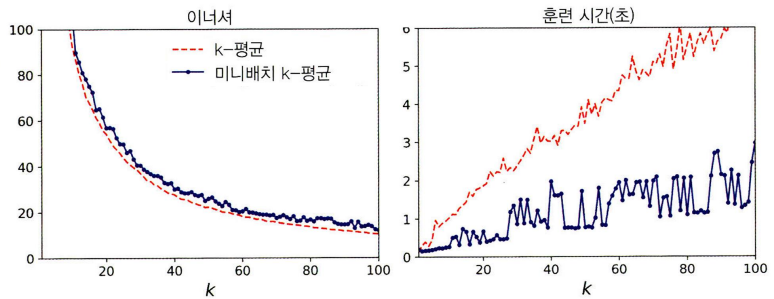

#### **최적의 클러스터 개수 찾기**
일반적으로 클러스터의 개수 k를 어떻게 설정해야하는지 쉽게 알 수 없으며, 올바른 개수를 지정하지 않으면 매우 나쁜 결과를 얻을 수 있다.

지금까지 사용한 예제에 대해 클러스터 개수를 3과 8로 지정하면 아래와 같은 일이 발생한다.



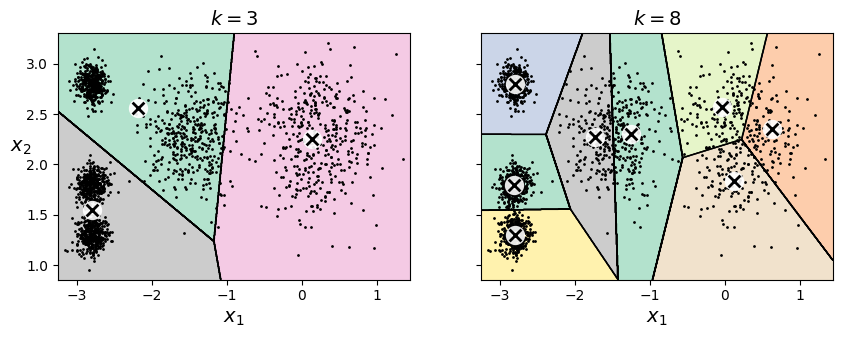

In [ ]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)  # 3개의 군집
kmeans_k8 = KMeans(n_clusters=8, random_state=42)  # 8개의 군집

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

가장 작은 이너셔를 갖는 클러스터 수를 선택하면 된다고 볼 수 있지만, **이너셔는 k가 증가함에 따라 점점 작아지게 되므로** 클러스터 개수를 선택하는데 좋은 성능 지표가 될 수 없다.

실제로 클러스터의 수가 늘어날수록 각 샘플은 가까운 센트로이드에 더 가까워져서 거리는 줄어들 수밖에 없으므로 이너셔는 더 작아지게 된다.

아래의 그래프는 k가 1부터 9까지 변하는 동안 훈련된 모델의 이너셔를 k의 함수로 나타낸 것이다.

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

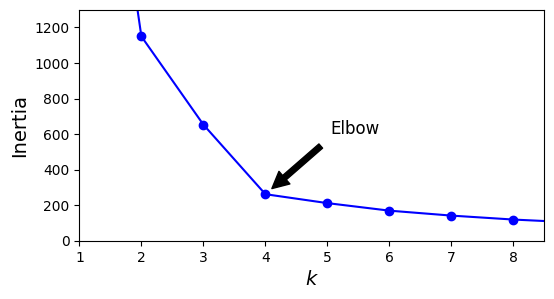

In [ ]:
plt.figure(figsize=(6, 3))

# 군집수와 관성 관계
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

# 주석 작성: Elbow 단어와 화살표 표시
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )

plt.axis([1, 8.5, 0, 1300])
plt.show()

그림에서 보듯이 이너셔는 k가 4가 될때까지 빠르게 감소하다가, k가 증가함에 따라 감소하는 폭이 점점 작아진다.

이렇게 이너셔의 함수에서 그래프가 심하게 꺾이는 팔꿈치와 같은 엘보 지점이 클러스터의 개수를 지정하는 좋은 선택이 될 수 있다.

그러나 이 방법보다 더 정확한 방법으로 **실루엣 점수**가 있다. 이 값은 **모든 샘플에 대한 실루엣 계수의 평균**이다.

샘플의 실루엣 계수는 $\frac{(b-a)}{\max(a,b)}$로 계산하며, 이때 $a$는 동일한 클러스터 내부의 평균 거리이며 $b$는 가장 가까운 클러스터까지의 평균 거리이다.

실루엣 계수의 범위는 -1에서 +1까지이다.
- +1에 가까우면 **자신의 클러스터 안에 잘 속해있고** 다른 클러스터와는 멀리 떨어져있다는 의미이다.
- 0에 가까우면 클러스터 경계에 위치한다는 의미이다.
- -1에 가까우면 이 샘플이 **잘못된 클러스터에 할당**되어 있다는 의미이다.

실루엣 점수를 계산하기 위해서는 사이킷런의 **`silhouette_score()`** 함수를 사용하며, 데이터셋에 있는 모든 샘플과 할당된 레이블을 전달한다.

아래의 그래프는 클러스터 개수를 다르게 하여 실루엣 점수를 나타낸 것이다. 이 그래프는 k=4가 좋은 선택이지만 k=5 역시 꽤 좋다는 사실을 보여준다. 이는 이너셔만을 이용하여 비교했을 때는 드러나지 않는 정보로 실루엣 계수가 훨씬 많은 정보를 준다는 것을 알 수 있다.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

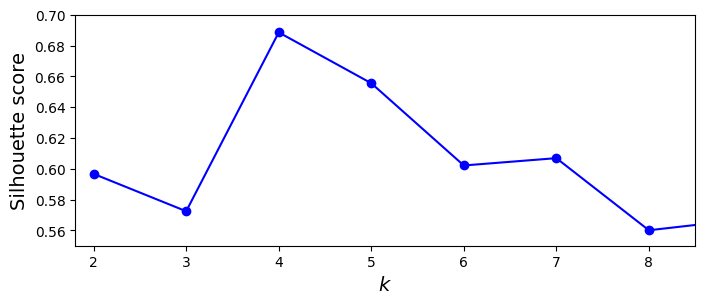

In [ ]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

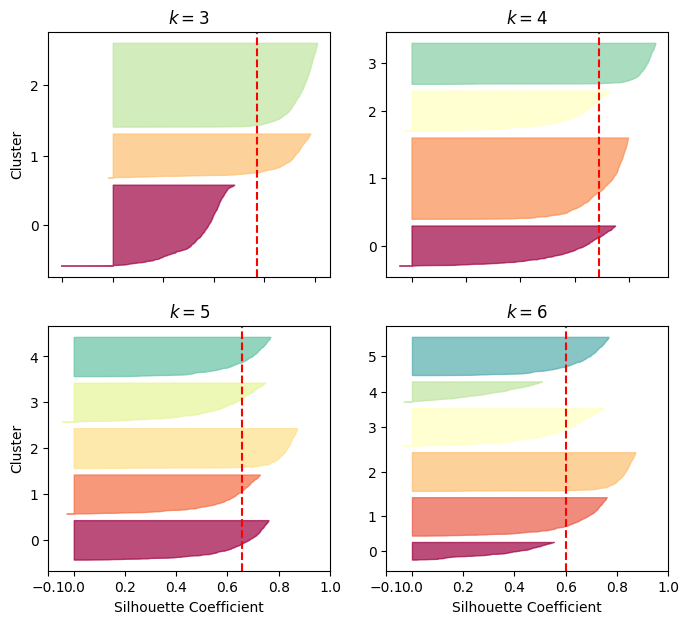

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
plt.figure(figsize=(8, 7))
for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    if k in (3, 5):
        plt.ylabel("Cluster")
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=12)

plt.show()

위의 그림처럼 모든 샘플의 실루엣 계수를 **할당된 클러스터와 그 계수값으로 정렬**하여 그린 것을 **실루엣 다이어그램**이라고 한다. 이 그래프로 더 많은 정보를 얻을 수 있다.

클러스터마다 칼 모양의 그래프가 그려진다. 이 그래프의 **높이는 클러스터가 포함하고 있는 샘플의 개수**를 의미하며, **너비는 이 클러스터에 포함된 샘플의 정렬된 실루엣 계수**를 의미한다. 따라서 너비는 넓을수록 더 좋다.

**수직 파선은 각 클러스터 개수에 해당하는 실루엣 점수**를 나타낸다. 한 클러스터의 샘플 대부분이 이 점수보다 낮은 계수를 가지면 클러스터의 샘플이 다른 클러스터와 너무 가깝다는 것을 의미하므로 나쁜 클러스터이다. k=3,6일 때 이런 나쁜 클러스터를 볼 수 있다.

k=4,5에서는 대부분의 샘플이 파선을 넘어서 뻗어 있고 1.0에 근접하므로 클러스터가 상당히 좋아보인다. 이때 k=5일 때 모든 클러스터의 크기가 비슷하므로 k=4일 때 전반적인 실루엣 점수가 더 높더라도 비슷한 크기의 클러스터를 얻을 수 있는 k=5를 선택하는 것이 좋다.

### 9.1.2 k-평균의 한계
k-평균 알고리즘은 속도가 빠르고 확장이 용이하다는 장점이 있지만 완벽한 것은 아니다.

앞서 보았듯이 최적이 아닌 솔루션을 피하려면 알고리즘을 여러번 시행해야 하며, 클러스터의 개수를 지정해야 한다. 또한 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닌 경우 잘 작동하지 않는다.

아래 코드는 타원 모양의 군집으로 이루어진 데이터셋을 생성하여 k-평균 알고리즘을 적용한 것이다.

먼저 알고 있는 센트로이드 정보를 이용하여 좋은 k-평균 모델을 훈련하고, 다음으로 센트로이드를 무작위로 지정하여 훈련한다.



In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]

X = np.r_[X1, X2]
y = np.r_[y1, y2]

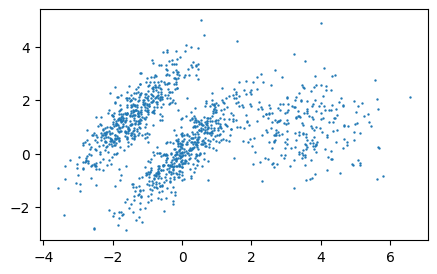

In [ ]:
plt.figure(figsize=(5,3))
plt.scatter(X[:,0], X[:,1], s=0.5)
plt.show()

In [ ]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_good.fit(X)

KMeans(init=array([[-1.5,  2.5],
       [ 0.5,  0. ],
       [ 4. ,  0. ]]),
       n_clusters=3, n_init=1, random_state=42)

In [ ]:
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

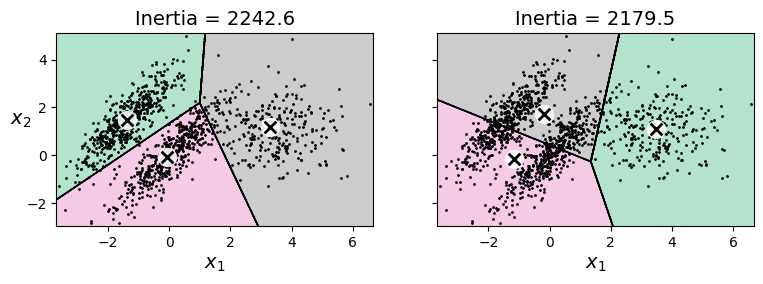

In [ ]:
plt.figure(figsize=(9,2.5))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

두 모델의 훈련 결과는 위의 그림과 같다.

오른쪽 그림을 보면 센트로이드를 무작위로 지정한 모델은 형편 없이 군집을 나눴다는 것을 알 수 있다.

반면에 왼쪽 모델은 오른쪽보다는 좋지만 그래도 25%정도의 데이터가 오른쪽 군집에 잘못 할당되었다.

데이터에 따라서 잘 수행할 수 있는 군집 알고리즘이 다르다. 위와 같은 **타원형 클러스터**에서는 **가우시안 혼합 모델**이 잘 작동한다.

또한 **k-평균 알고리즘을 실행하기 전**에 **입력 특성의 스케일을 맞추는 것**이 중요하다. 그렇지 않으면 클러스터가 길쭉해지고 k-평균의 결과가 좋지 않다. 특성의 스케일을 맞춘다고 모든 클러스터가 잘 구분되고 원형의 형태를 가진다고 보장할 수는 없지만 일반적으로 더 좋아진다.

### 9.1.3 군집을 사용한 이미지 분할
**이미지 분할**은 **이미지를 여러 개의 세그먼트(segment)로 분할**하는 작업이다.

**시맨틱 분할**에서는 **동일한 종류의 물체**에 속한 **모든 픽셀은 같은 세그먼트에 할당**된다.

예를 들어 자율 주행 자동차의 비전 시스템에서 보행자 이미지를 구성하는 모든 픽셀은 '보행자' 세그먼트에 할당되며, 각 보행자는 다른 세그먼트가 될 수 있다. 시맨틱 또는 인스턴스 분할에서 최고 수준의 성능을 내기 위해서는 합성곱 신경망을 사용한 복잡한 모델을 사용해야 한다.

여기서는 훨씬 쉬운 작업인 **색상 분할**을 수행하는데, 이는 **동일한 색상을 가진 픽셀을 같은 세그먼트, 즉 같은 군집에 할당**하는 기법이다.

색상 분할 과정을 살펴보기 위해 무당벌레 이미지를 하나 다운로드한다. 다운로드된 이미지는 533 x 800 픽셀 크기의 칼라 사진이다. 이 이미지는 3D 배열로 표현되는데, 첫번째 차원의 크기가 높이, 두번째 차원이 너비, 세번째 차원이 컬러 채널 개수이다. 컬러 채널은 빨강, 초록, 파랑으로 각 픽셀에 대해 빨강, 초록, 파랑의 강도를 담은 3D 벡터가 있는 것이다.

k-평균 모델 훈련을 위해 이미지 픽셀을 일차원으로 변환한다. 즉, (533, 800, 3) 모양의 array를 (426400, 3) 모양의 array로 변환한다.


In [ ]:
import os, urllib

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# 무당벌레 이미지 다운로드
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"

filename = "ladybug.png"
print("Downloading", filename)

url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7e4783ec7610>)

In [ ]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [ ]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

아래 코드는 8개의 군집을 이용한 색상 분할을 수행한 것이다. 먼저 `n_clusters=8`로 지정한 k-평균 모델을 생성한다.

다음으로 각 훈련 샘플에 대한 레이블`(kmeans.labels_)`을 이용하여 군집별 센트로이드의 색상으로 통일시킨다. 이를 위해 넘파이 어레이에 대한 팬시 인덱싱을 활용한다.

그리고 다시 이미지를 원래의 크기로 변환한다.

In [ ]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)

In [ ]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

아래 코드는 앞서 설명한 방식을 다양한 군집수에 대해 적용한 결과를 비교할 수 있는 그림을 보여준다. 5종류의 클러스터 개수를 이용하여 이미지 색상 분할을 수행하고 보이는 이미지를 출력한다.

클러스터의 개수가 작아져서 8개보다 작아지면 **무당벌레의 이미지는 나머지 부분보다 훨씬 작기 때문에** k-평균이 무당벌레를 하나의 클러스터로 만들지 못한다. 즉 무당벌레의 빨간색이 독자적인 클러스터를 만들지 못하고 주위 색에 합쳐져서 다른 군집과 연결하게 되므로 무당벌레 색상이 점차 사라지게 된다.

In [ ]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)

for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

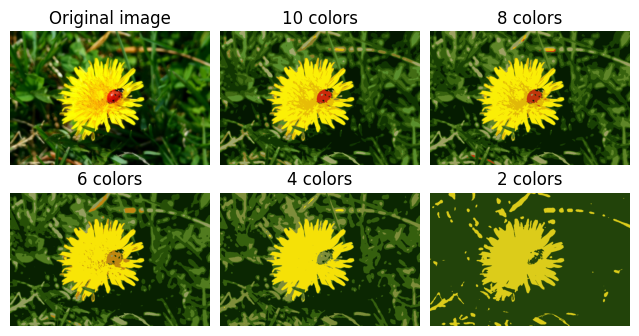

In [ ]:
plt.figure(figsize=(8,4))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

# 원본 이미지
plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

# 색상 분할된 이미지 5개
for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

### 9.1.4 군집을 사용한 전처리
**군집은 차원 축소에 효과적인 방법**으로, 특히 지도 학습 알고리즘을 적용하기 전에 전처리 단계로 사용할 수 있다.

군집화를 차원 축소 기법으로 활용하는 방식을 소개하기 위해 MNIST 손글씨 데이터셋을 이용한다. 다만 여기서 사용되는 데이터셋은 8x8 크기의 픽셀을 갖는 1797개의 축소된 MNIST 데이터셋을 사용한다.



In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

다음으로 로지스틱 회귀 모델을 훈련한 다음에 테스트 세트에 대한 성능을 평가하면, 정확도 평균 값이 96.8888% 정도로 나온다.

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [ ]:
log_reg.score(X_test, y_test)

0.9688888888888889

기준값으로 96.9%의 정확도를 얻었으므로, **k-평균을 전처리 단계**로 사용하여 정확도가 더 좋아지는지 확인한다.

파이프라인을 만들어서 **먼저 50개의 클러스터로 군집화**를 한 다음에 **로지스틱 회귀 모델을 훈련**시킨다. 여기서 파이프라인으로 구성된 예측기의 `fit()` 메서드를 호출하면 최종 예측기를 제외한 나머지 예측기의 `fit_transform()` 메서드가 호출된다. 또한 k-평균 모델의 `transform()` 메서드는 앞서 설명한 방식으로 차원 축소를 진행한다.

파이프라인 모델의 정확도 평균 값을 측정하면 97.7%로 성능이 향상되었음을 확인할 수 있다.



In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [ ]:
pipeline.score(X_test, y_test)

0.9777777777777777

앞에서는 클러스터의 개수를 임의로 50개로 정했으므로 클러스터의 개수를 바꾸면 더 좋은 성능을 낼 수도 있다.

**k-평균이 분류 파이프라인의 하나의 전처리 단계**이므로 이전보다 좋은 k 값을 찾는 것이 더 쉽다. 실루엣 분석을 하거나 이너셔가 감소되는지 확인할 필요 없이, **가장 좋은 k 값은 교차 검증에서 가장 좋은 분류 성능을 내는 값**이다.

이는 `GridSearchCV`를 사용하여 최적의 클러스터 개수를 찾을 수 있다.

`GridSearchCV`를 사용하여 교차 검증에서 가장 좋은 분류 성능을 내는 값을 찾으면 최적의 군집수는 88이며, 로지스틱 회귀의 정확도는 98.2%가 된다.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(10, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             n_jobs=-1, param_grid={'kmeans__n_clusters': range(10, 100)},
             verbose=2)

In [ ]:
grid_clf.best_params_

{'kmeans__n_clusters': 88}

In [ ]:
grid_clf.score(X_test, y_test)

0.9822222222222222

### 9.1.5 군집을 사용한 준지도 학습
준지도 학습은 **약간의 레이블이 있는 샘플이 존재하고 대부분의 샘플엔 레이블이 없는 데이터셋**에 대한 지도 학습 기법이다.

준지도 학습 설명을 위해 미니 MNIST 데이터셋을 계속 이용한다.

먼저 무작위로 선정된 50개의 샘플만을 대상으로 로지스틱 회귀 모델을 훈련하면 테스트 세트의 정확도 평균 값이 83.33% 정도로 낮게 나오는데, 이는 훈련 세트가 작아서 훈련이 제대로 되지 않기 때문이다.


In [ ]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

log_reg.score(X_test, y_test)

0.8333333333333334

이를 개선하기 위해 무작위로 50개의 샘플을 선택하는 대신, 훈련 세트를 50개의 군집으로 **군집화**한 뒤에 **각 군집의 센트로이드에 가장 가까운 이미지** 50개를 찾는다. 이런 이미지를 **대표 이미지**라고 한다.

`fit_transform()`으로 변환된 훈련 세트는 50개의 특성을 가지며, 샘플 별로 50개 군집 센트로이드와의 거리를 특성값으로 갖는다. 따라서 특성 별로 최소값을 갖는 인덱스가 각각 50개 군집의 센트로이드에 가장 가까운 샘플을 가리킨다. 이 성질을 이용하여 대표 이미지를 아래와 같이 선정한다.


In [ ]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

In [ ]:
representative_digit_idx = np.argmin(X_digits_dist, axis=0)  # 50개의 대표이미지 인덱스 확인
X_representative_digits = X_train[representative_digit_idx]  # 50개의 대표이미지 지정

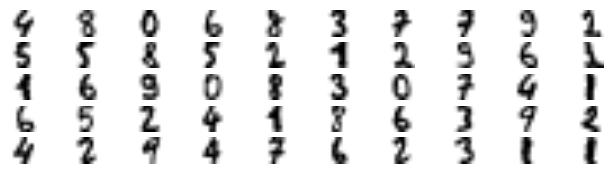

In [ ]:
plt.figure(figsize=(8,2))

for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [ ]:
y_train[representative_digit_idx]

array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

실제 타깃(레이블)은 할당하여 레이블된 50개 샘플로 이루어진 데이터셋을 준비할 수 있다.

이 데이터셋은 무작위로 고른 샘플이 아니라 각 클러스터를 대표하는 이미지로, 이를 이용하여 로지스틱 회귀 모델을 다시 학습시키고 테스트 세트에 대한 정확도를 측정한다.

50개의 대표 이미지를 이용하여 로지스틱 회귀 모델을 훈련시킨 결과 성능이 92.2%로 좋아졌다. 이를 통해 무작위로 선정된 샘플의 레이블을 이용하는 것보다 **군집화를 이용하여 대표 샘플을 선정한 후에 이 데이터를 이용하여 학습**하면 더 좋은 성능의 모델이 생성됨을 확인하였다.

In [ ]:
y_representative_digits = y_train[representative_digit_idx]

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9222222222222223

더 나아가서 이 레이블을 동일한 클러스터에 있는 모든 샘플로 전파할 수 있다.

**레이블 전파**라고 부르는 이 방식은 **동일한 군집에 속하는 샘플의 레이블을 대표 이미지의 레이블로 지정**하는 방법이다.

아래 코드는 군집별로 해당 클러스터에 속하는 샘플의 레이블을 대표 이미지의 레이블로 지정하는 것이다. 그 다음 다시 로지스틱 회귀 모델을 이용하여 정확도를 측정한다.


In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)

for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

log_reg.score(X_test, y_test)

0.9333333333333333

모델의 정확도가 93.3%로 어느정도 상승하긴 했지만 놀라운 정도는 아니다.

이는 각 대표 샘플의 레이블을 동일한 클러스터에 있는 모든 샘플에 전파했기 때문으로, 클러스터 경계에 가깝게 위치한 샘플들이 포함되어 레이블이 잘못 부여되었을 것으로 보인다.

이번에는 각 군집의 센트로이드와 가까운 샘플의 20%에만 대표 샘플의 레이블을 전파하고, 나머지 샘플은 무시한다.

아래 코드는 군집별로 센트로이드 근접도가 상위 20%가 아닌 샘플들을 센트로이드와의 거리를 -1로 지정하는 방식을 이용하여 제외시킨다. 그 다음 군집별로 센트로이드 근접도가 상위 20% 안에 드는 샘플만 훈련 세트로 추출한다.

In [ ]:
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

In [ ]:
percentile_closest = 20

for i in range(k):
    in_cluster = (kmeans.labels_ == i)                 # 군집별 샘플 대상
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)   # 군집별 센트로이드 근접도 상위 20% 경곗값
    above_cutoff = (X_cluster_dist > cutoff_distance)  # 군집별 센트로이드 근접도 상위 20% 이내 샘플 대상
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [ ]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

선정된 샘플만을 대상으로 부분적으로 레이블을 전파한 데이터셋을 이용하여 다시 로지스틱 회귀 모델을 학습시키고 성능을 평가하면 테스트 세트의 정확도가 94%로 상승하였다.

앞서 전체 데이터셋으로 학습시킨 로지스틱 회귀 모델의 정확도 96.9%와 가까운 값으로, 전파된 레이블이 실제로 좋은 역할을 하여 좋은 성능을 얻을 수 있었던 것으로 볼 수 있다.

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

log_reg.score(X_test, y_test)

0.94

### 9.1.6 DBSCAN
**DBSCAN** 알고리즘은 **데이터셋의 밀도를 이용하여 군집을 구성**한다. **밀집된 연속적 지역을 클러스터**로 정의하며, 작동 방식은 다음과 같다.
- 알고리즘이 **각 샘플에서 작은 거리인 $𝜀$ 내**에 샘플이 몇 개인지 계산하고, 이 지역의 샘플을 **$𝜀$-이웃**이라고 한다.
- **$𝜀$-이웃 내**에 **적어도 `min_samples`개의 샘플이 있다면** 이를 핵심 샘플로 간주한다. 즉 **핵심 샘플은 밀집된 지역에 있는 샘플**을 의미한다.
- 핵심 샘플의 **이웃에 있는 모든 샘플은 동일한 클러스터**에 속한다. 이웃에는 다른 핵심 샘플이 속할 수도 있다. 따라서 핵심 샘플의 이웃의 이웃은 계속해서 하나의 클러스터를 형성한다.
- 핵심 샘플이 아니고 이웃도 아닌 샘플은 **이상치**로 판단한다.


즉 **하나의 군집**은 **핵심 샘플의 이웃의 이웃 관계로 이루어진 샘플들의 집합**이다.

DBSCAN은 **모든 클러스터가 충분히 밀집**되어 있고 **밀집되지 않은 지역과 잘 구분될 때** 좋은 성능을 낸다.

사이킷런이 제공하는 `DBSCAN` 클래스를 이용하여 쉽게 구현할 수 있다.

아래 코드는 1000개의 샘플로 이루어진 moons 데이터셋 생성하고 이를 이용하여 `DBSCAN`을 테스트하는 것이다.
 - `eps=0.05`: 엡실론 반경
 - `min_samples`: $𝜀$ 반경 안에 있어야하는 최소 샘플 수

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

학습시킨 `DBSCAN` 모델에 `labels_` 인스턴스 변수를 이용해서 **모든 샘플의 레이블을 확인**할 수 있다.

0부터 6까지 총 7개의 군집이 생성되었다. 이때 **군집 인덱스가 -1**인 일부 샘플들이 존재하게 되는데 이는 **해당 샘플들이 이상치로 간주되었음**을 의미한다.

**핵심 샘플의 인덱스**는 인스턴스 변수 **`core_sample_indices_`**를 이용하여 확인할 수 있다. 이 모델은 총 808개의 핵심 샘플을 갖는다.

**핵심 샘플** 자체는 **`components_`**에 저장되어 있다.

In [ ]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [ ]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [ ]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [ ]:
len(dbscan.core_sample_indices_)

808

In [ ]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

plot_dbscan() 함수는 군집화된 샘플을 보여준다. 군집은 색으로 구분되며 각 샘플을 핵심 샘플, 이상치, 기타(non-core samples)로 구분한다.

- 핵심 샘플: 지정된 반경 안에 지정된 수의 샘플이 포함되는 샘플로, 군집별 다른 색상 사용
- 이상치: 어떤 핵심 샘플의 반경 안에도 포함되지 않는 샘플로, 빨강 X로 표시
- 기타: 다른 핵심 샘플의 반경 안에 있지만 자체는 핵심 샘플이 아닌 경우로, 검은 점으로 표시.

In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    # 코어 샘플 구분용 마스크 설정
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    # 이상치 구분용 마스크 설정
    anomalies_mask = dbscan.labels_ == -1
    # 기타 샘플용 마스크 설정
    non_core_mask = ~(core_mask | anomalies_mask)

    # 핵심 샘플
    cores = dbscan.components_
    # 이상치
    anomalies = X[anomalies_mask]
    # 기타
    non_cores = X[non_core_mask]

    # 핵심 샘플 산점도: 각 샘플과 함께 반경도 함께 표현
    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])

    # 이상치 산점도: 빨강 X 표시
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)

    # 기타 샘플 산점도: 책과는 달리 명확한 구분을 위해 검은 점으로 표시
#     plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c="k", marker=".")

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)

    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

하이퍼파라미터 `eps`를 0.2로 증가시켜서 샘플의 이웃 범위를 넓혀서 다시 학습시켰다. 그 결과 0과 1, 2개의 군집이 형성되었다.

아래의 그림은 `eps=0.05`와 `eps=0.2`로 지정한 `DBSCAN` 모델의 군집화 결과를 시각화한 것이다.

`eps`를 증가시킨 오른쪽 그림에서 완벽한 군집을 얻었음을 확인할 수 있다.


In [ ]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [ ]:
np.unique(dbscan2.labels_)

array([0, 1])

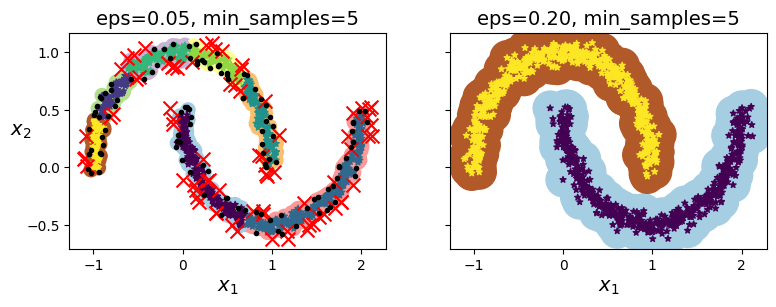

In [ ]:
plt.figure(figsize=(9,2.8))

# 왼편 그림: 반경 0.05
plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

# 오른편 그림: 반경 0.2
plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

`DBSCAN`은 `predict()` 메서드는 제공하지 않고 `fit_predict()` 메서드를 제공한다. 즉 이 알고리즘으로는 **새로운 샘플에 대해 클러스터를 예측할 수 없다.**

이유는 DBSCAN 모델의 특성상 **예측을 하려면 예측에 사용되는 데이터 샘플을 포함하여 핵심 샘플을 다시 계**산해야 하기 때문인데, 이는 **예측할 때마다 매번 학습을 다시** 해야 한다는 것을 의미한다.

반면에 주어진 샘플에 대해 가장 가까운 군집을 예측하는 일은 간단하게 구현되므로 다른 분류 알고리즘이 이런 작업을 더 잘 수행할 수 있다.

예를 들어, k-최근접 이웃 분류기인 `KNeighborsClassifier` 모델을 학습시키면 된다.
**k-최근접 이웃 분류** 모델은 주어진 샘플 근처의 k개의 샘플에 대한 **타겟 값들의 최빈값을 주어진 샘플의 예측값**으로 지정한다.

아래 코드는 앞서 학습된 DBSCAN 모델의 핵심 샘플만을 이용하여 k-최근접 이웃 분류기를 훈련한다. 이웃 샘플의 수는 50으로 정한다.

In [ ]:
dbscan = dbscan2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

훈련된 k-최근접 이웃 분류기의 `predict()` 메서드를 이용하여 새로운 샘플들에 대한 클래스를 예측한다. 또한 `predict_proba()` 메서드를 이용하면 각 클래스에 속할 확률도 계산한다. 아래 결과에서 볼 수 있듯이 0번과 1번 클래스에 속할 확률을 각 샘플에 대해 계산한다.

아래 코드는 네 개의 새로운 샘플에 대한 예측값을 포함하여 두 군집의 결정 경계를 잘 보여준다.

In [ ]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [ ]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

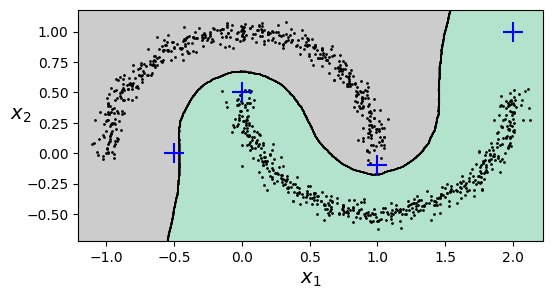

In [ ]:
plt.figure(figsize=(6,3))

# 결정경계 그리기: knn 모델의 predict() 메서드 활용
plot_decision_boundaries(knn, X, show_centroids=False)
# 네 개의 샘플 표기: 파랑 + 기호
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)

plt.show()

DBSCAN은 간단하지만 강력한 알고리즘이다. **클러스터의 모양과 개수에 상관없이 감지**할 수 있으며, **이상치에 안정적**이고 하이퍼파라미터도 `eps, min_samples`로 2개뿐이다.

그러나 클러스터 간의 밀집도가 크게 다르다면 모든 클러스터를 올바르게 잡아내는 것이 불가능하다.

계산 복잡도는 대략 $O(m\log m)$으로, 샘플 개수에 대해 거의 선형적으로 증가한다.

### 9.1.7 다른 군집 알고리즘


#### **계층적 DBSCAN** (HDBSCAN)
DBSCAN 모델은 **군집의 밀집도가 변하는 데이터셋**에 대해서는 잘 작동하지 않는다. 이런 한계를 극복하기 위해 **다양한 $ε$을 이용하여 최적의 군집을 찾는** HDBSCAN 모델을 활용할 수 있다.

#### **스펙트럼 군집화** (Spectral Clustering)
스펙트럼 군집화는 샘플 사이의 **유사도 행렬**을 이용하여 **저차원으로 차원 축소를 진행**한다. 그 다음 축소한 저차원 공간에서 **또 다른 군집 알고리즘을 사용하여 군집화를 진행**하는 기법이다.

유사도 행렬은 가우시안 rbf(방사기저함수) 등을 이용하여 계산하며, 차원 축소는 커널 PCA와 유사한 방식으로 이루어진다.

스펙트럼 군집화는 **복잡한 클러스터 구조를 감지**하고 그래프 컷을 찾는데 사용할 수 있으나, 샘플의 개수가 많거나 클러스터의 크기가 매우 다르면 잘 작동하지 않는다.

사이킷런의 `SpectralClustering` 클래스를 사용하여 구현할 수 있으며, 군집 개수를 지정해야 한다. 사이킷런은 군집 알고리즘으로 k-평균을 사용한다.

#### **병합 군집화** (Agglomerative Clustering)
병합 군집화는 **계층 군집화(hierchical clustering)의 주요 기법**이다.

**가장 작은 단위의 군집은 개별 샘플 하나**로 이루어지며, 반복마다 인접한 **두 개의 군집을 합치며 점점 군집의 수를 줄여 나간다.** 군집화 대상인 두 개의 군집은 병합했을 때 **두 샘플 사이의 연결 거리가 최소가 되도록 유도**하며 이를 위해 탐욕 알고리즘을 사용한다.

병합 군집화는 대규모 샘플과 클러스터에 잘 확장되며, 다양한 형태의 클러스터를 감지할 수 있다.

사이킷런의 `AgglomerativeClustering` 클래스를 이용하여 병합 군집화 모델을 구현할 수 있다. 연결 거리를 나타내는 하이퍼파라미터 `linkage`는 다음 옵션 종류에 따라 다르게 측정되며 기본 옵션은 'ward'이다.

#### **BIRCH**
BIRCH은 특별히 **대규모 데이터셋**을 위해 고안된 알고리즘이다.

특성 개수가 20개 이하 정도로 너무 많지 않다면 배치 k-평균보다 빠르고 비슷한 결과를 만들어낸다.

훈련 과정에서 새로운 샘플을 클러스터에 빠르게 할당할 수 있는 정보를 담은 트리 구조를 만든다. 이 트리는 모든 샘플을 저장하지 않아서 제한된 메모리를 사용하여 대용량 데이터셋을 다룰 수 있다.

#### **평균-이동**
평균-이동 알고리즘은 다음과 같은 방식으로 작동한다.
1. 먼저 각 샘플을 중심으로 하는 원을 그린다.
2. 그 다음 **원마다 안에 포함된 모든 샘플의 평균**을 구하고, **원의 중심을 평균점으로 이동**시킨다.
3. 모든 원이 움직이지 않을 때까지 이 평균-이동을 계속한다.

평균-이동은 **지역의 최대 밀도를 찾을 때까지 높은 쪽으로 원을 이동**시킨다. 동일한 지역에 안착한 원에 있는 모든 샘플은 동일한 클러스터가 된다.

평균-이동은 DBSCAN과 유사한 특징을 갖는다. **모양이나 개수에 상관없이** 클러스터를 찾을 수 있으며, 국부적인 밀집도 추정에 의존한다. 하이퍼파라미터도 `bandwidth`라는 원의 반경 1개이다.

그러나 DBSCAN과는 다르게 **클러스터 내부 밀집도가 불균형할 때 여러 개로 나누는 경향**이 있다.

계산 복잡도는 $O(m^2)$로, 대규모 데이터셋에는 적합하지 않다.






#### **유사도 전파**
유사도 전파 알고리즘은 투표 방식을 사용한다. 각 샘플은 **자신을 대표할 수 있는 비슷한 샘플에 투표**한다. 알고리즘이 수렴하면 **각 대표와 투표한 샘플이 클러스터를 형성**한다.

**크기가 다른 여러 개의 클러스터를 감지**할 수 있다는 장점이 있다.

계산 복잡도는 $O(m^2)$로, 대규모 데이터셋에는 적합하지 않다.


## 9.2 가우시안 혼합 모델 (GMM)
가우시안 혼합 모델(Gaussian Mixture Model)은 **샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정**하는 확률 모델이다.

**하나의 가우시안 분포**에서 생성된 모든 샘플은 **하나의 클러스터를 형성**하며, 이 클러스터는 일반적으로 **타원형**이다.

각 클러스터는 타원의 모양, 크기, 밀집도, 방향이 다르다. 샘플이 주어지면 가우시안 분포 중 하나에서 생성되었다는 것은 알지만 어떤 분포인지, 이 분포의 파라미터는 무엇인지는 알지 못한다.

가장 간단한 GMM 버전이 `GaussianMixture` 클래스에 구현되어 있다. 이때 사전에 혼합된 가우시안 분포의 개수 $k$를 알아야 한다.

예를 들어 데이터셋 $𝐗$가 다음 확률 과정을 통해 생성되었다고 가정한다.
- 샘플마다 $k$개의 클러스터 중 랜덤하게 하나의 클러스터가 선택된다. $j$번째 클러스터를 선택할 확률은 클러스터의 가중치 $𝜙^{(j)}$로 정의된다. $i$번째 샘플을 위해 선택된 클러스터 인덱스는 $𝑧^{(i)}$로 표시한다.
- $𝑧^{(i)}=j$, 즉 $i$번째 샘플이 $j$번째 클러스터에 선택되었다면 이 샘플의 위치 $𝐱^{(i)}$는 평균이 $𝛍^{(j)}$, 공분산 행렬이 $𝚺^{(j)}$인 가우시안 분포에서 랜덤하게 샘플링 된다.
- 이를 $𝐱^{(i)} \sim N(𝛍^{(j)},𝚺^{(j)})$ 라고 쓴다.

이 생성 과정을 아래와 같은 그래프 모형으로 나타낼 수 있다. 이때 확률 변수 $𝐱^{(i)}$는 알고 있는 값으로 **관측 변수**라고 한다. 반대로 알려지지 않은 확률 변수 $𝑧^{(i)}$를 **잠재 변수**라고 한다.

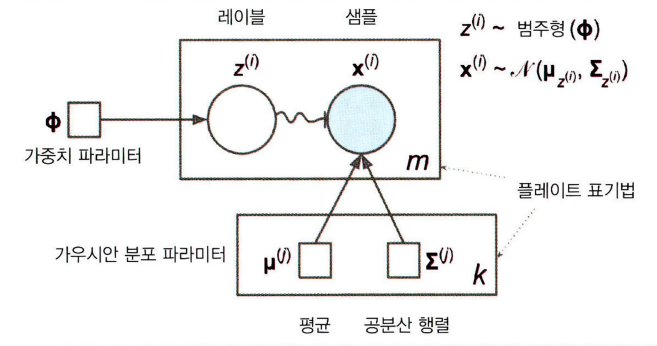

먼저 데이터셋 $𝐗$가 주어지면 가중치 $𝛟$와 전체 분포의 파라미터 $𝛍^{(1)}$에서 $𝛍^{(k)}$까지와 $𝚺^{(1)}$에서 $𝚺^{(k)}$까지를 추정한다.

이는 사이킷런의 `GaussianMixture` 클래스를 사용하여 쉽게 구할 수 있다. 이때 하이퍼파라미터 **`n_components`**에 **혼합된 가우시안 분포의 개수**를 지정해야 한다.

아래 코드는 `GaussianMixture` 클래스의 활용법을 설명하기 위해 사용되는 데이터셋을 생성한 것이다.
 - 군집 수 : 3 개
 - 군집 크기 비: 500:500:250, 즉 4:4:2.
 - X1: 두 개의 군집으로 이루어진 데이터셋
 - X2: 다른 군집에 비해 밀도가 낮음

In [ ]:
# 군집 2개
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

# 셋째 군집
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]

# 데이터셋 병합
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

학습된 `GaussianMixture` 알고리즘이 추정한 파라미터를 확인할 수 있다.

가중치 인스턴스 `weights_`는 **군집별 크기 비**를 나타내며, 4:4:2로 생성했으므로 거의 제대로 추정하였다.

군집별 **평균 값**은 `means_`로, **공분산**은 `covariances_`로 확인할 수 있다다.

In [ ]:
gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [ ]:
gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [ ]:
gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

`GaussianMixture` 클래스는 **기댓값-최대화(EM)** 알고리즘을 사용하는데, 이 알고리즘은 k-평균 알고리즘과 공통점이 많다.

클러스터 파라미터를 랜덤하게 초기화하고 수렴할 때까지 두 단계를 반복한다.
- 먼저 샘플을 클러스터에 할당한다. 이를 **기댓값**(Expectation) 단계라고 한다.
- 그 다음 클러스터를 업데이트한다. 이를 **최대화**(Maximization) 단계라고 한다.

EM 알고리즘은 **소프트 클러스터 할당**을 사용하는데, 기댓값 단계에서 알고리즘은 현재 클러스터 파라미터에 기반하여 각 클러스터에 속할 확률을 예측한다. 그 다음 최대화 단계에서 각 클러스터가 데이터셋에 있는 모든 샘플을 사용하여 업데이트 된다.

EM 알고리즘 역시 나쁜 솔루션으로 수렴할 수 있다. 따라서 여러번 실행하여 가장 좋은 솔루션을 선택해야 한다. `n_init`으로 실행 횟수를 지정할 수 있다.

학습된 `GaussianMixture` 클래스에 **`converged_`**와 **`n_iter_`**를 사용하여 알고리즘의 수렴 여부와 반복 횟수를 확인할 수 있다.



In [ ]:
gm.converged_

True

In [ ]:
gm.n_iter_

4

각 클러스터의 위치, 크기, 모양, 방향, 상대적인 가중치를 예측한 모델을 생성한 것이다. 이제 새로운 샘플이 주어질 때 이 모델을 이용하여 클러스터에 할당하거나 특정 클러스터에 속할 확률을 예측할 수 있다.

새로운 샘플을 **가장 비슷한 클러스터에 할당**하여 **군집 인덱스**를 구하는 것을 **하드 군집**이라고 한다. `predict()` 메서드를 사용하여 수행한다.

반면 새로운 샘플이 **특정 클러스터에 속할 확률을 예측**하는 것을 **소프트 군집**이라고 한다. `predict_proba()` 메서드를 사용하여 수행한다.

In [ ]:
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2])

In [ ]:
gm.predict_proba(X)

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

가우시안 혼합 모델은 **생성 모델**이다. 생성 모델은 학습된 정보를 이용하여 **새로운 샘플을 생성** 할 수 있으며, **속한 군집에 대한 정보도 함께 제공**한다.

즉 `GaussianMixture` 모델에 **`sample()` 메서드를 사용하면 새로운 샘플**을 만들 수 있다. 생성하고 싶은 샘플의 개수를 입력하면, 생성되어 반환된 샘플은 클러스터 인덱스 순으로 정렬되어 있다.

또한 **`score_samples()`** 메서드를 사용하여 **주어진 위치에서의 모델의 밀도를 추정**할 수 있다. 특정 샘플이 주어지면 `score_samples()` 메서드는 그 위치의 확률 밀도 함수(PDF)의 로그를 예측한다. 이 점수가 높을수록 밀도가 높다.

이 점수의 지숫값을 계산하면 각 샘플의 위치에서 PDF 값을 얻을 수 있다. 이 값은 하나의 확률이 아닌 확률 밀도이므로 0에서 1 사이의 값이 아니라 어떤 양수값도 될 수 있다.

In [ ]:
gm.sample(6)

(array([[-0.86944074, -0.32767626],
        [ 0.29836051,  0.28297011],
        [-2.8014927 , -0.09047309],
        [ 3.98203732,  1.49951491],
        [ 3.81677148,  0.53095244],
        [ 2.84104923, -0.73858639]]),
 array([0, 0, 1, 2, 2, 2]))

In [ ]:
gm.score_samples(X)

array([-2.60768954, -3.57110232, -3.32987086, ..., -3.51347241,
       -4.39798588, -3.80746532])

In [ ]:
np.exp(gm.score_samples(X))

array([0.07370464, 0.02812483, 0.03579773, ..., 0.02979328, 0.01230209,
       0.02220439])

plot_gaussian_mixture()는 가우시안 혼합 모델이 알아낸 군집 결정 경계와 샘플의 로그밀도 등고선을 그리는 함수이다.

그림을 보면 군집 경계와 로그밀도 등고선이 제대로 그려지는 것을 확인할 수 있다.

In [ ]:
from matplotlib.colors import LogNorm
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    # 로그밀도 등고선 그리기
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    # score_samples가 기본적으로 음수이기에 양수로 변환함
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0), levels=np.logspace(0, 2, 12), linewidths=1, colors='k')

    # 결정경계 그리기: 빨강 파선
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=2, colors='r', linestyles='dashed')

    # 데이터 산점도 및 센트로이드 그리기
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

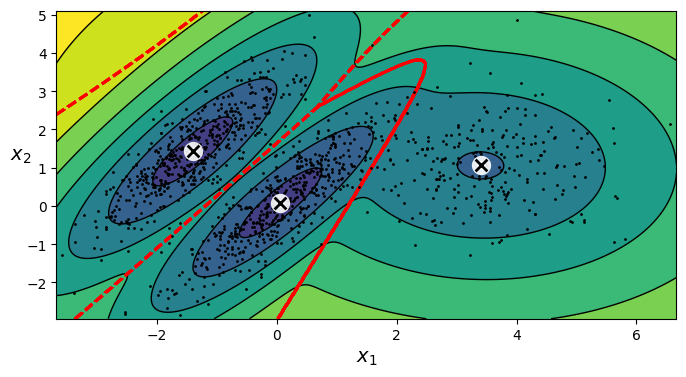

In [ ]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.show()

특성이나 클러스터가 많거나 샘플의 수가 적을 때는 EM이 최적의 솔루션으로 수렴하기 어렵다. 이런 작업의 어려움을 줄이기 위해서는 **알고리즘이 학습할 파라미터의 개수를 제한**해야 한다.

이 방법 중 하나는 **클러스터의 모양과 방향의 범위를 제한**하는 것이다. `GaussianMixture`의 하이퍼파라미터 `covariance_type` 매개변수를 이용하여 다음과 같이 공분산 행렬에 제약을 추가하면 된다.
- 'full': 기본값
- 'spherical': 모든 클러스터가 원형이지만 분산이 다르므로 지름이 다르다.
- 'diag': 크기에 상관없이 어떤 타원형도 가능하다. 그러나 공분산 행렬이 대각 행렬이어야 한다.
- 'tied': 모든 클러스터가 동일한 타원 모양, 크기, 방향을 가진다. 즉 모든 클러스터는 동일한 공분산 행렬을 공유한다.

아래의 그림은 `covariance_type` 매개변수를 다양하게 지정한 `GaussianMixture` 모델을 학습시키고 EM 알고리즘으로 찾은 솔루션들을 나타낸 것이다.

compare_gaussian_mixtures()는 서로 다른 옵션을 사용하는 두 모델의 결과를 비교하는 그래프를 그리는 함수이다.

In [ ]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [ ]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9,3))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=12)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=12)

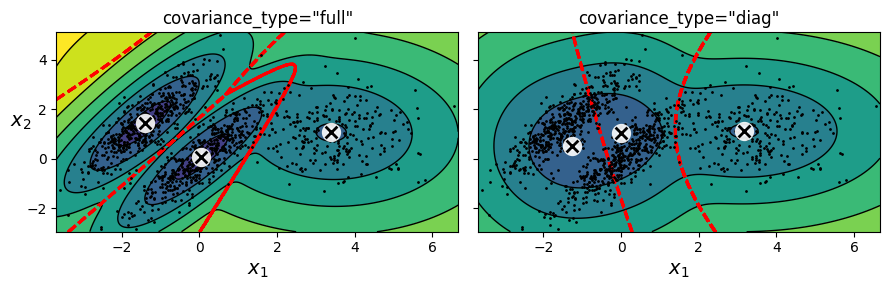

In [ ]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

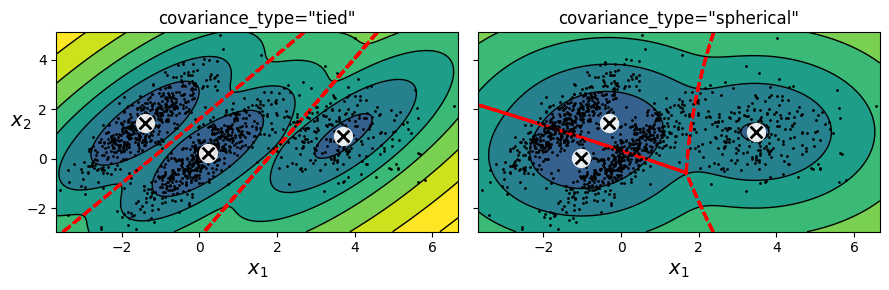

In [ ]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)
plt.tight_layout()
plt.show()

### 9.2.1 가우시안 혼합을 사용한 이상치 탐지
보통과 많이 다른 샘플을 이상치라고 하며 보통 샘플은 정상치라고 한다. 이렇게 **보통과 많이 다른 샘플인 이상치를 감지하는 작업**을 **이상치 탐지**(outlier detection)라고 한다.

이상치 탐지는 다양한 애플리케이션에서 사용할 수 있다. 예를 들어 부정 거래 감지, 제조 결함이 있는 제품을 감지하는데 사용되며 모델을 학습시키기 전에 데이터셋에서 이상치를 제거하는데 사용한다.

이상치 탐지에 가우시안 혼합 모델을 사용하는 방법은 **밀도가 낮은 지역에 있는 모든 샘플을 이상치로 판단**하는 것이다. 이를 위해서는 사용할 **밀도의 임계값**을 정해야 하며 경우에 따라 다르게 지정한다.

아래 코드는 만약 제조 회사의 제조 결함률이 4% 정도라고 알려져 있다고 가정하여 밀도 임계값을 4%의 제조 결함률이 이상치로 판명되도록 정하는 것이다. 아래의 그림으로 밀도 4% 이하의 지역에 위치한 이상치를 나타낸다.

In [ ]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)  # 4%를 이상치로 처리하는 밀도 임곗값
anomalies = X[densities < density_threshold]     # 이상치

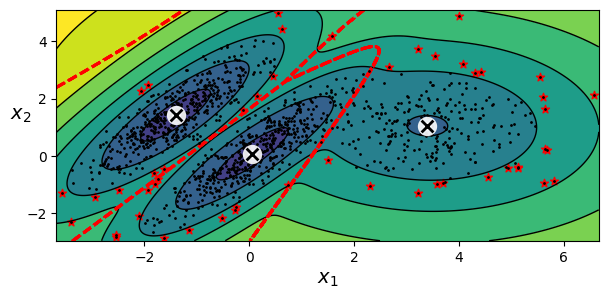

In [ ]:
plt.figure(figsize=(7,3))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')  # 이상치 표시: 빨강 별표
plt.ylim(top=5.1)
plt.show()

이상치 탐지와 비슷한 작업으로 **특이치 탐지**가 있다. 특이치 탐지는 **이상치로 오염되지 않은 깨끗한 데이터셋에서 학습한다**는 점에서 이상치 탐지와 다르다.

### 9.2.2 클러스터 개수 선택하기
`GaussianMixture`는 `n_components`에 혼합된 가우시안 분포의 개수를 지정해야 한다. 즉 k-평균 알고리즘에서 클러스터의 개수를 선택해야 하는 것과 유사하다.

k-평균 알고리즘에서는 이너셔와 실루엣 점수를 사용하여 적절한 군집의 개수를 선택할 수 있다. 그러나 GMM에서는 **이너셔, 실루엣 점수 등을 사용할 수 없다.** 이러한 지표들은 클러스터가 타원형이거나 크기가 다를 때 안정적이지 않은데, GMM이 형성하는
군집은 임의의 타원 형태를 띌 수 있기 때문이다.

대신에 **BIC 또는 AIC**와 같은 이론적 정보 기준을 최소화하는 값을 적절한 군집 개수로 사용할 수 있다.

$BIC = \log(m)p-2\log(\hat L)$

$AIC = 2p−2\log(\hat L)$
 - $m$: 훈련 세트 크기
 - $p$: 모델이 학습해야 하는 파라미터 개수
 - $\hat L$: 모델의 가능도 함수(likelihood function)의 최댓값

BIC와 AIC 모두 **값이 낮을 수록 좋은 모델**이다. 이는 학습할 파라미터가 많은 즉 클러스터가 많은 모델에 페널티를 가하고, 데이터를 잘 학습하는 모델에게 보상을 더한다는 것을 의미한다.

두 기준은 종종 동일한 모델을 선택하나, 둘의 선택이 다른 경우 BIC가 선택한 모델이 AIC보다 파라미터가 적어 간단한 경향이 있다.

학습된 모델의 BIC와 AIC는 각각 `bic(), aic()` 메서드를 이용하여 구할 수 있다.

In [ ]:
gm.bic(X)

8189.747000497186

In [ ]:
gm.aic(X)

8102.521720382148

아래의 코드는 군집 개수를 1개에서 10개까지 변화시키면서 10개의 가우안 혼합 모델을 학습시킨 것이다. 다음 아래의 그림은 여러 가지 클러스터 개수 $k$에 대한 BIC와 AIC의 변화를 나타낸 것이다.

그림에서 볼 수 있듯 $k=3$에서 BIC와 AIC 모두 가장 작으므로 $k=3$이 최선의 선택으로 보인다.



In [ ]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

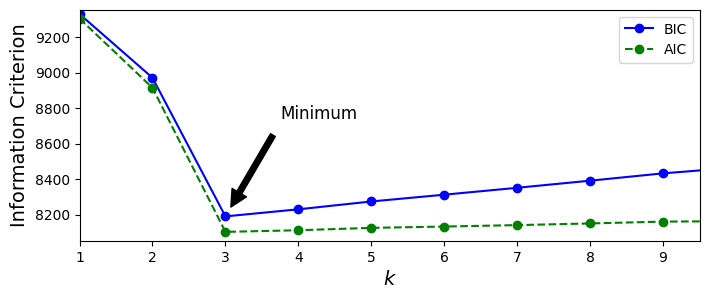

In [ ]:
plt.figure(figsize=(8,3))

plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")

plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])

plt.annotate('Minimum', xy=(3, bics[2]), xytext=(0.35, 0.6),
             textcoords='figure fraction', fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )

plt.legend()
plt.show()

### 9.2.3 베이즈 가우시안 혼합 모델
**베이즈 가우시안 혼합 모델**은 군집 수를 미리 정하기 보다는 **필요한 만큼의 군집만을 선택해서 사용**한다.

사이킷런의 `BayesianGaussianMixture` 클래스는 **불필요한 군집의 가중치를 0 또는 거의 0에 가깝게 만드는 방식**으로 필요한 만큼의 군집만 사용한다. 클러스터의 개수 `n_components`에 최적 클러스터 개수보다 크다고 믿을 만한 값으로 지정한다. 그렇게 하면 이 알고리즘은 자동으로 불필요한 클러스터를 제거한다.

**`weights_`** 인스턴스를 확인하면 3개의 클러스터의 가중치만 0이 아니므로, 3개의 군집만 필요하다는 사실을 확인할 수 있다. 또한 군집 크기의 비가 4:4:2로 제대로 예측된 것으로 보인다.

아래의 그림은 군집 결정 경계로 적절하게 군집화된 것 같다.

In [ ]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [ ]:
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

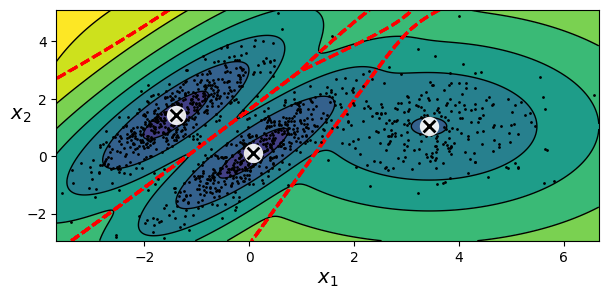

In [ ]:
plt.figure(figsize=(7,3))
plot_gaussian_mixture(bgm, X)
plt.show()

가우시안 혼합 모델은 데이터셋을 타원 형태의 군집으로 분할하려 하므로 **타원형 클러스터에 잘 작동**한다.

따라서 moons 데이터셋과 같이 다른 모양을 가진 데이터셋에 학습하는 경우 제대로된 군집화를 진행하지 못한다.

아래 코드는 moons 데이터셋에 `BayesianGaussianMixture` 클래스를 이용하여 베이즈 가우시안 혼합 모델을 적용한 것이다. 결정 경계를 그려본 결과 2개가 아닌 8개의 군집을 찾는 것을 보여준다.

In [ ]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [ ]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

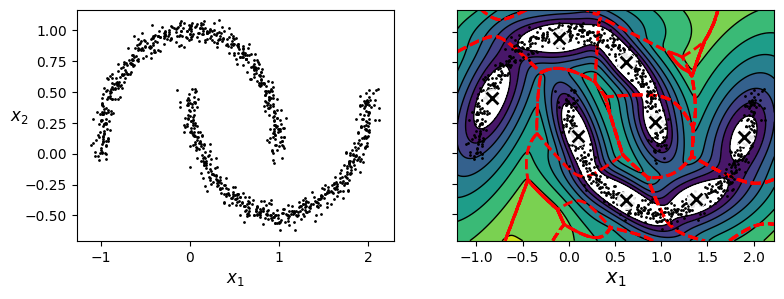

In [ ]:
plt.figure(figsize=(9,3))
plt.tight_layout()
plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", fontsize=12, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

plt.show()

### 9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘
사이킷런에는 이상치 탐지와 특이치 탐지 전용으로 사용할 수 있는 몇 가지 알고리즘이 구현되어 있다.


#### **PCA** (그리고 `inverse_transform()` 메서드를 가진 다른 차원 축소 기법)
보통 샘플, 즉 **정상치의 재구성 오차와 이상치의 재구성 오차를 비교**하면 일반적으로 이상치의 재구성 오차가 훨씬 크다.

이는 간단하고 종종 아주 효과적인 이상치 탐지 기법이다.

#### **Fast-MCD**
`EllipticEnvelope` 클래스에서 구현된 이 알고리즘은 이상치 감지에 유용하며, 특히 **데이터셋을 정제할 때 사용**된다.

**정상 샘플이 하나의 가우시안 분포에서 생성되었다**고 가정하며, **이 가우시안 분포에서 생성되지 않은 이상치로 인해 해당 데이터셋이 오염되었다**고 가정한다.

알고리즘이 가우시안 분포의 **파라미터를 추정할 때 이상치로 의심되는 샘플을 무시**한다. 이런 기법은 알고리즘이 타원형을 잘 추정하고 이상치를 잘 구분하도록 도운다.

#### **Isolation Forest**
Isolation Forest는 특히 **고차원 데이터셋에서 이상치 감지**를 위한 효율적인 알고리즘이다.

이 알고리즘은 무작위로 성장한 결정 트리로 구성된 랜덤 포레스트를 만든다. 각 노드에서 특성을 랜덤하게 선택한 후 랜덤한 임계값을 골라서 데이터셋을 둘로 나눈다. 이런 식으로 데이터셋이 점차 분리되어 **모든 샘플이 다른 샘플과 격리될 때까지 진행**한다.

**이상치는** 일반적으로 다른 샘플과 멀리 떨어져 있으므로 모든 결정 트리에 걸쳐서 **평균적으로 정상 샘플과 적은 단계에서 격리**된다.

#### **LOF**
LOF(Local Outlier Factor)는 **이상치 탐지**에 좋다.

주어진 **샘플 주위의 밀도와 이웃 주위의 밀도를 비교**한다.

이상치는 종종 k개의 최근접 이웃보다 더 격리된다.

#### **one-class SVM**
one-class SVM는 **특이치 탐지**에 잘 맞는다.

먼저 모든 샘플을 **고차원 공간에 매핑**한 다음 이 고차원 공간에서 SVM 분류기를 이용하여 두 클래스를 분리한다. 여기서 샘플의 **클래스가 하나**이므로 **one-class SVM 알고리즘이 원본 공간으로부터 고차원 공간에 있는 샘플을 분리**한다.

원본 공간에서는 모든 샘플을 둘러싼 작은 영역을 찾는 것에 해당한다. 새로운 샘플이 **이 영역 안에 놓이지 않는다면 이상치**이다.

조정할 하이퍼파라미터가 적으며, 특히 **고차원 데이터셋**에 잘 작동한다.

그러나 모든 SVM 분류기와 마찬가지로 대규모 데이터셋으로의 확장이 어렵다.